# Pre-training Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Understanding the Data

In [3]:
loanDF = pd.read_csv('./data/loan.csv')
loanDF.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loanDF.shape

(9578, 14)

In [5]:
loanDF.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Here is a quick description of what these columns mean.

- credict.policy: Loaners use a criteria to determine if a client is suitable for a loan or not. A '1' denotes yes while a '0' denotes no.
- purpose: Self-explanatory.
- int.rate: The interest rate.
- installment: When a loan is issued, this is the amount owed per month. 
- log_annual_inc: Self-reported income by the client. A natural log transformation occured here.
- dti: A ratio between the amount of debt and the annual income.
- fico: Fair Issac Corporation who invented the credit score essentially.
- days.with.cr.line: A credit line is a dynamic loan. Essentially, clients can borrow money anytime (with a limit), and they pay as they go.
- revol.bal: Revolving balance or the amount unpaid per credit billing cycle.
- revol.util: The ratio between credit line used and total available credit.
- inq.last.6mths: How many times did creditors check on clients in the last 6 months.
- delinq.2yrs: A deliquent is when a payment was due by over 30 days. The count is for the last 2 years.
- pub.rec: The number of derogatory public records.
- not.fully.paid: The target variable. '1' means yes i.e. loan has not been fully paid while a '0' means no i.e. loan is fully paid off.


In [6]:
loanDF.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Cleaning Part 1

This data has already been cleaned, but it does not hurt to check.

In [7]:
loanDF[loanDF.isnull().any(axis = 1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [8]:
loanDF.duplicated().value_counts()

False    9578
Name: count, dtype: int64

In [9]:
loanDF['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

# EDA

Before changes are made to the data, here are some visualizations that can determine which rows and columns are dropped, which columns are combined, and how to deal with the `purpose` column.

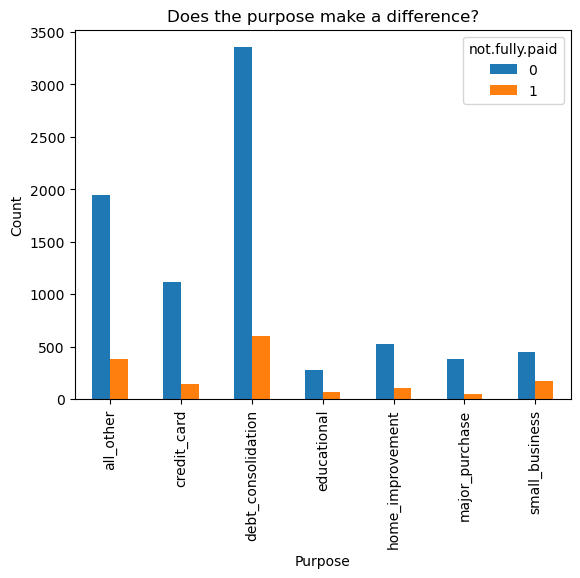

In [10]:
# First with the purpose column.
loanDF.groupby(['purpose', 'not.fully.paid'])['dti'].count().unstack().plot(kind = 'bar')
plt.title('Does the purpose make a difference?')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

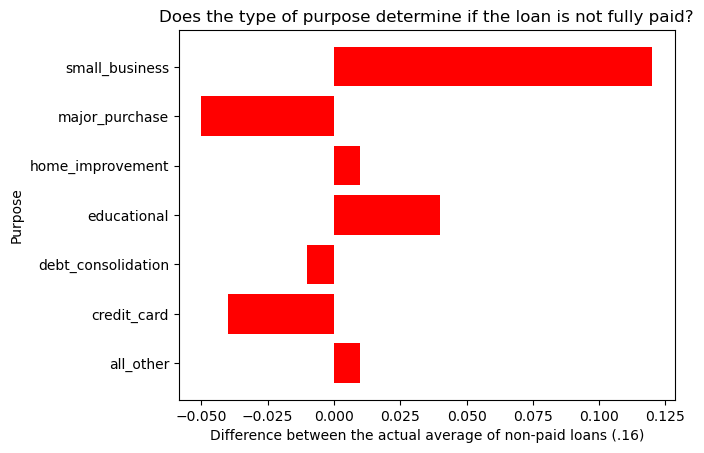

In [14]:
# Looking at percentage not fully paid debt with label '0' for each purpose.
purposePercentageDifference = []
purposeTotalDF = loanDF.groupby(['purpose'])['not.fully.paid'].count()
purposeSplitDF = loanDF.groupby(['purpose', 'not.fully.paid'])['dti'].count()
totalTargetCounts = loanDF['not.fully.paid'].value_counts()
totalPercentage = totalTargetCounts[1] / len(loanDF)
for i in range(len(loanDF['purpose'].unique())):
    percentageDifference = (purposeSplitDF[(i * 2) + 1] / purposeTotalDF[i]) - totalPercentage
    purposePercentageDifference.append(round(percentageDifference, 2))
    
plt.barh(purposeTotalDF.index, purposePercentageDifference, color = 'red')
plt.title('Does the type of purpose determine if the loan is not fully paid?')
plt.xlabel('Difference between the actual average of non-paid loans (.16)')
plt.ylabel('Purpose')
plt.show()

It might be worth to combine some of these purposes. There can be consideration for the small business, major purchase, educational, and the credit card loans as they deviate from the true average the most.

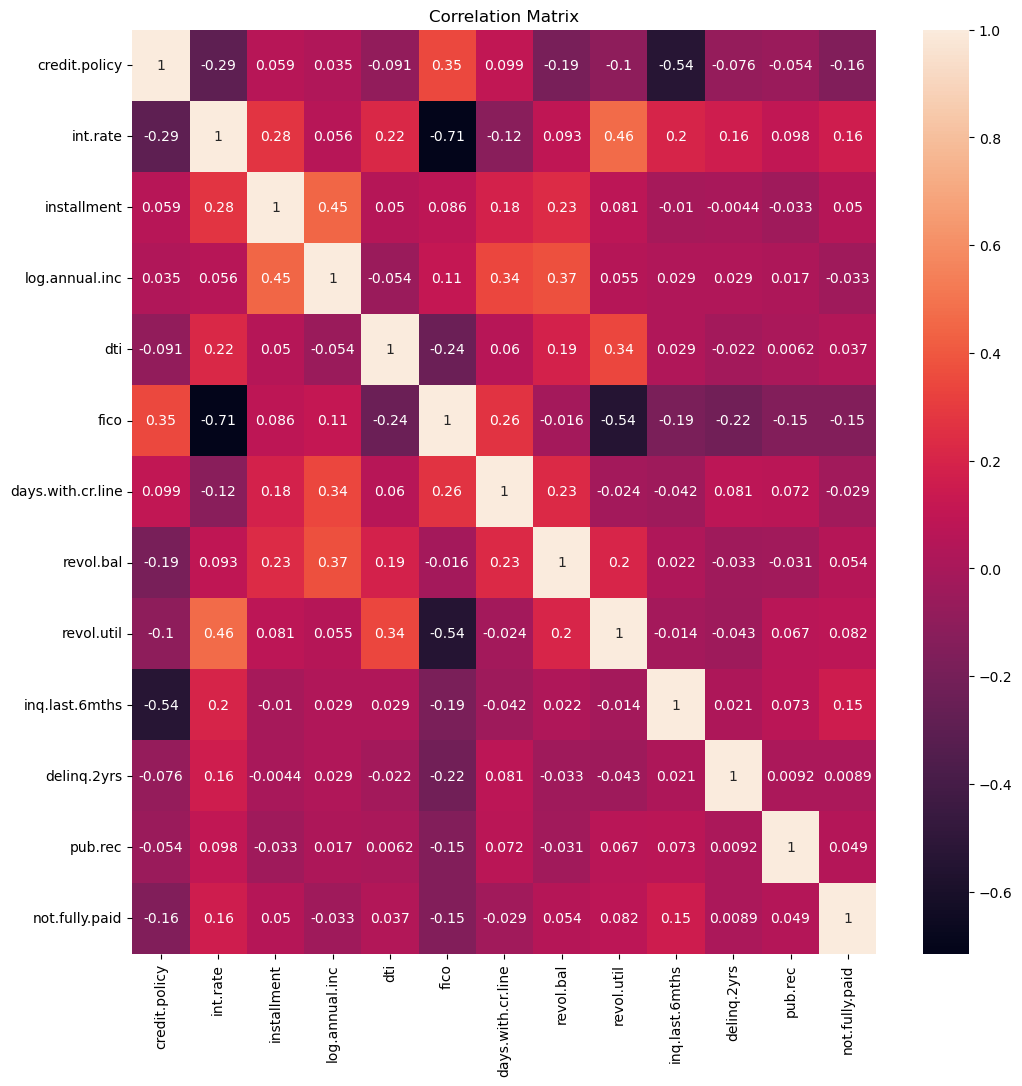

In [21]:
plt.figure(figsize = (12, 12))
sns.heatmap(loanDF.drop(['purpose'], axis = 1).corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

We will drop the columns which have correlations between $-.05$ and $.05$. These columns are *log.annual.inc, dti, days.with.cr.line, delinq.2yrs, and pub.rec*. In fact, it might be better to combine the last two columns with the *inq.last.6mths*, since they are all signs of unpaid loans.

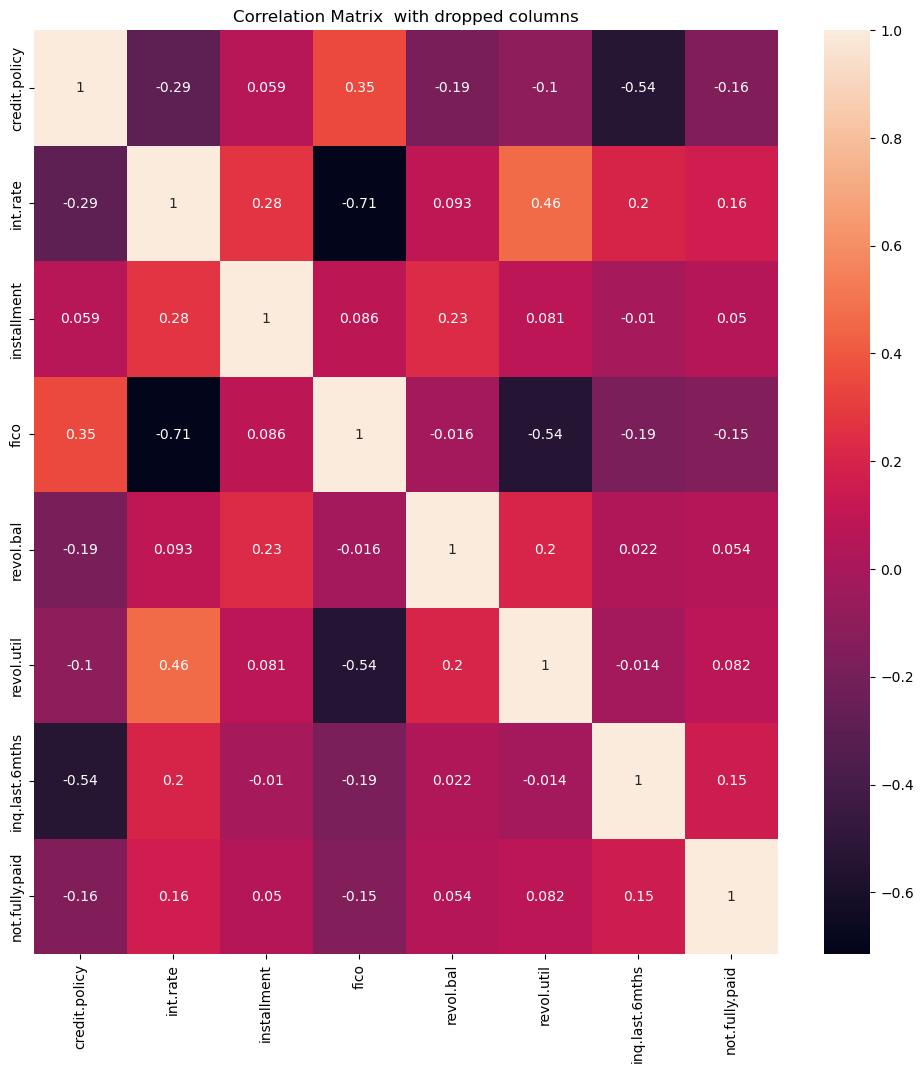

In [30]:
plt.figure(figsize = (12, 12))
sns.heatmap(loanDF.drop(['purpose', 'log.annual.inc', 'dti', 'days.with.cr.line', 'delinq.2yrs', 'pub.rec'], axis = 1).corr(), annot = True)
plt.title('Correlation Matrix  with dropped columns')
plt.show()

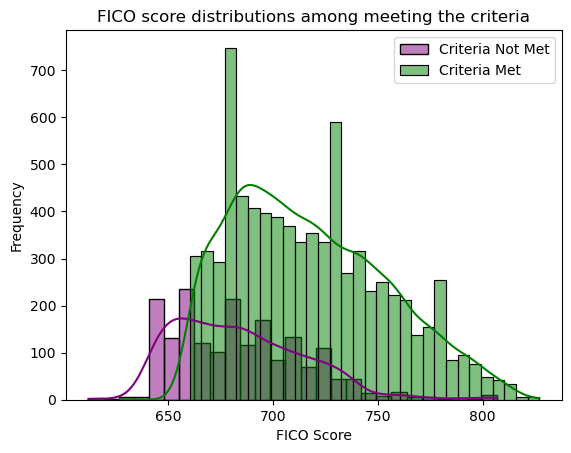

In [57]:
sns.histplot(data = loanDF[loanDF['credit.policy'] == 0],  x = 'fico', label = 'Criteria Not Met', color = 'purple', kde = True)
sns.histplot(data = loanDF[loanDF['credit.policy'] == 1],  x = 'fico', label = 'Criteria Met', alpha = .5, color = 'green', kde = True)
plt.legend()
plt.title('FICO score distributions among meeting the criteria')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

It might be worth dropping the `fico` column since it has a really strong correlation with the `int.rate` column. Plus, it seems there is not a huge difference when the credit score is factored in. 

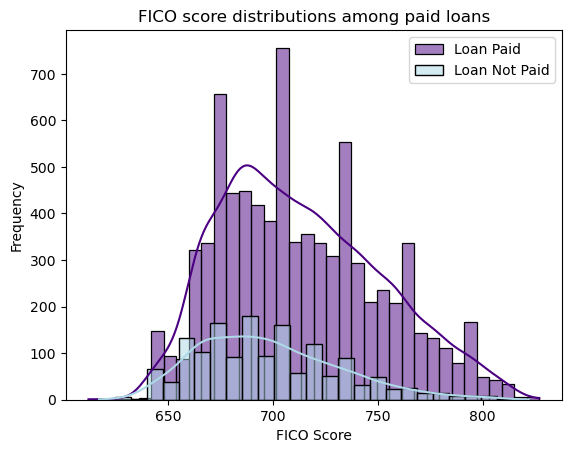

In [59]:
sns.histplot(data = loanDF[loanDF['not.fully.paid'] == 0],  x = 'fico', label = 'Loan Paid', color = 'indigo', kde = True)
sns.histplot(data = loanDF[loanDF['not.fully.paid'] == 1],  x = 'fico', label = 'Loan Not Paid', alpha = .5, color = 'lightblue', kde = True)
plt.legend()
plt.title('FICO score distributions among paid loans')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

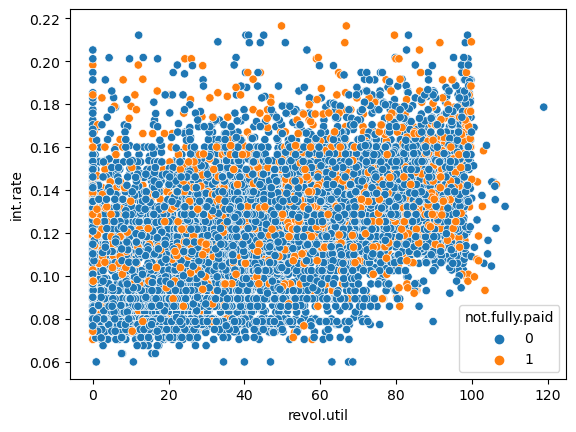

In [61]:
sns.scatterplot(data = loanDF, x = 'revol.util', y = 'int.rate', hue = 'not.fully.paid')
plt.show()

Since `revol.util` and `int.rate` are too correlated, `revol.util` will be dropped. 